In [ ]:
import pandas as pd

# Load your dataset
#  'data.csv' 
df = pd.read_csv('PupilBioTest.csv')

# Calculate total CpG coverage for each row
df['Total_Coverage'] = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1)

# Group by Tissue
grouped = df.groupby('Tissue')

# Calculate Median and Coefficient of Variation (CV)
results = grouped['Total_Coverage'].agg(
    Median='median',
    Mean='mean',
    StdDev='std'
)
results['CV'] = results['StdDev'] / results['Mean']

# Save results to a CSV or print them
results.to_csv('coverage_statistics.csv')
print(results)

In [1]:
import pandas as pd

# Load your dataset
#  'data.csv' 
df = pd.read_csv('PupilBioTest.csv')

# Calculate total CpG coverage for each row
df['Total_Coverage'] = df[['`000']].sum(axis=1)

# Group by Tissue
grouped = df.groupby('Tissue')

# Calculate Median and Coefficient of Variation (CV)
results = grouped['Total_Coverage'].agg(
    Median='median',
    Mean='mean',
    StdDev='std'
)
results['CV'] = results['StdDev'] / results['Mean']

# Save results to a CSV or print them
results.to_csv('coverage_statistics_000.csv')
print(results)

        Median        Mean       StdDev        CV
Tissue                                           
Islet     63.0  118.133494   141.621767  1.198828
cfDNA    405.0  901.169325  1233.919835  1.369243


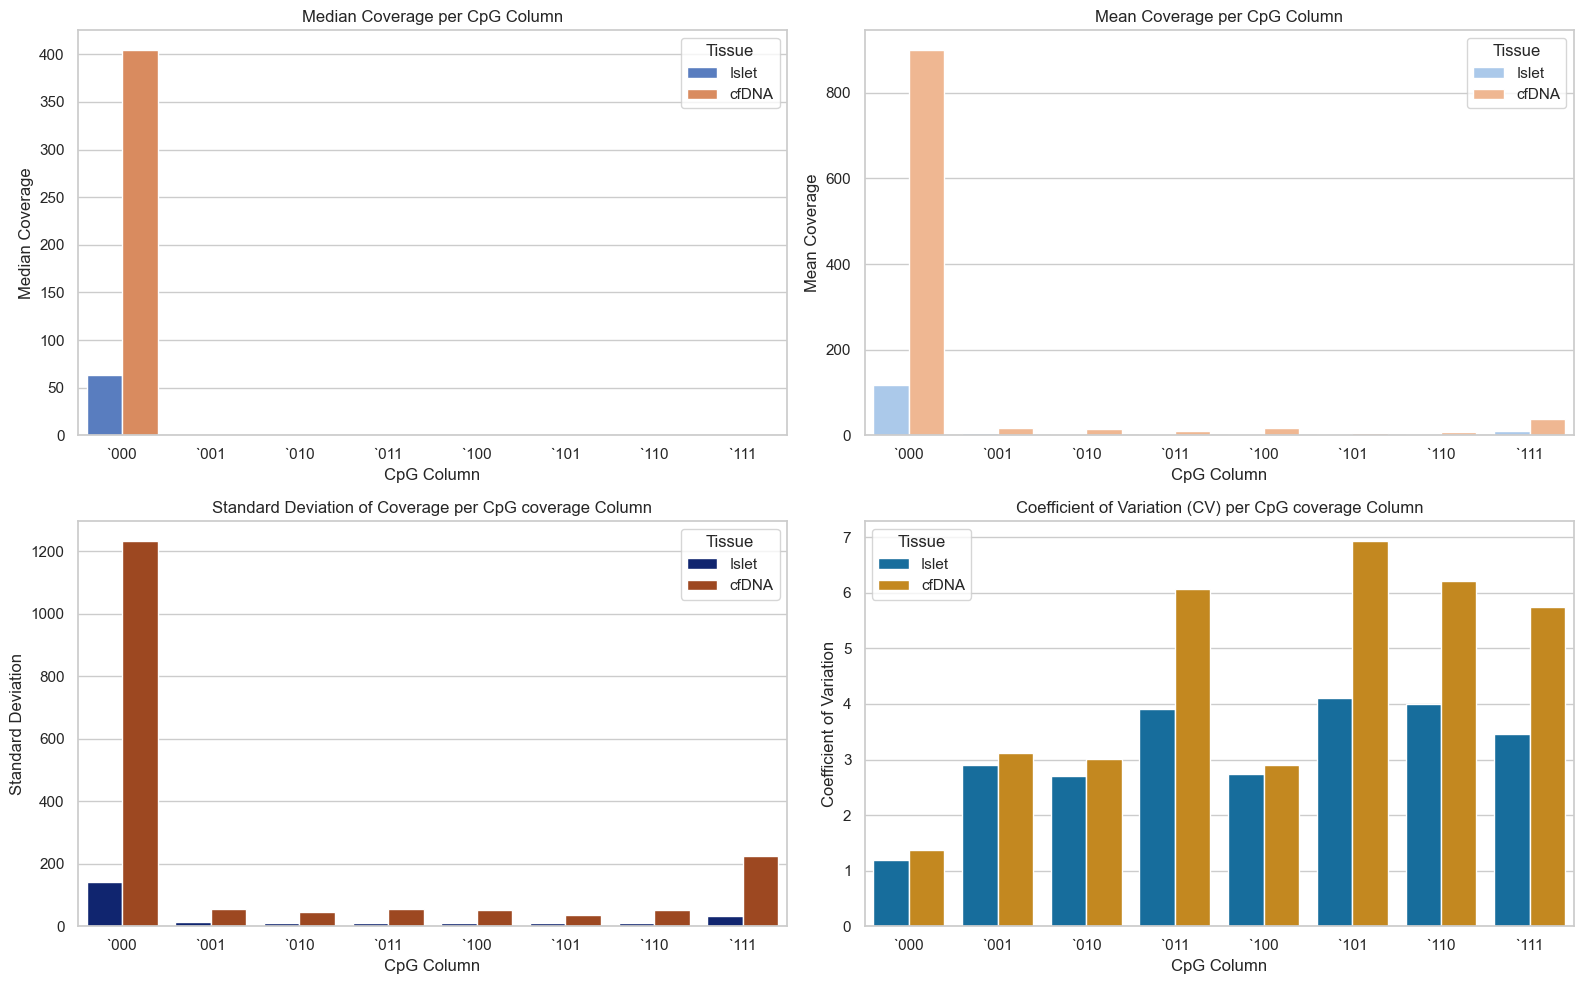

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your results dataset (after running the statistics script)
# Replace 'single_cpg_coverage_statistics.csv' with the actual file path
results = pd.read_csv('single_cpg_coverage_statistics.csv')

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# 1. Median plot
plt.subplot(2, 2, 1)
sns.barplot(data=results, x='CpG_Column', y='Median', hue='Tissue', palette='muted')
plt.title('Median Coverage per CpG Column')
plt.xlabel('CpG Column')
plt.ylabel('Median Coverage')

# 2. Mean plot
plt.subplot(2, 2, 2)
sns.barplot(data=results, x='CpG_Column', y='Mean', hue='Tissue', palette='pastel')
plt.title('Mean Coverage per CpG Column')
plt.xlabel('CpG Column')
plt.ylabel('Mean Coverage')

# 3. Standard Deviation plot
plt.subplot(2, 2, 3)
sns.barplot(data=results, x='CpG_Column', y='StdDev', hue='Tissue', palette='dark')
plt.title('Standard Deviation of Coverage per CpG coverage Column')
plt.xlabel('CpG Column')
plt.ylabel('Standard Deviation')

# 4. CV plot
plt.subplot(2, 2, 4)
sns.barplot(data=results, x='CpG_Column', y='CV', hue='Tissue', palette='colorblind')
plt.title('Coefficient of Variation (CV) per CpG coverage Column')
plt.xlabel('CpG Column')
plt.ylabel('Coefficient of Variation')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('coverage_statistics_plots.png', dpi=300)
plt.show()
